In [1]:
%matplotlib notebook

In [2]:
from random import randint
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [3]:
def Curva(r = 10):
    X = []
    Y = []
    for x in np.arange(-r,r+1, 0.1):
        y = np.sin(x)
        Y.append(y)
        X.append(x)
    return X, Y

In [30]:
plt.close()

<IPython.core.display.Javascript object>


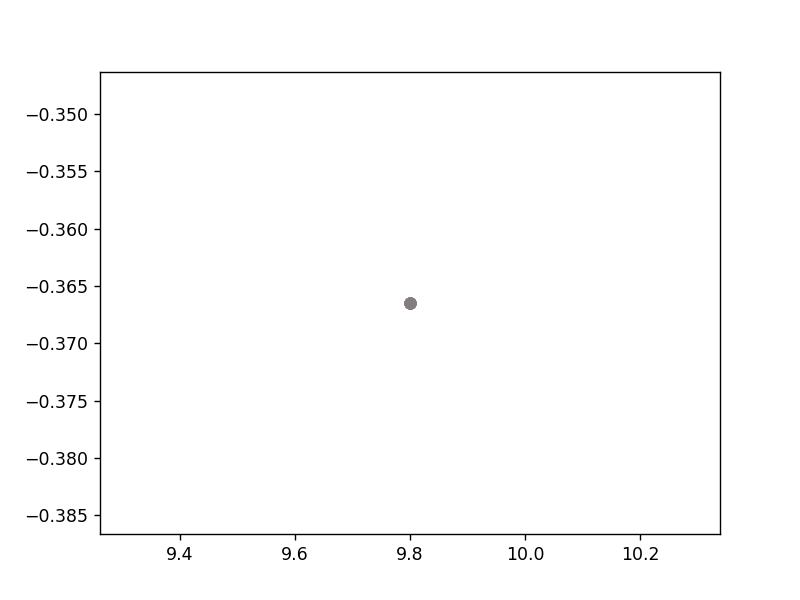

In [106]:
# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig = plt.figure()

long = np.arange(-10, 10, 0.2)
nFrames = long.shape[0]

PastPos = (-10, np.sin(-10))
e = 0.00001
PastDer = None

def animate(i):
    #plt.scatter(PastPos)
    try:
        global PastPos, PastDer
        plt.clf()
        X, Y = Curva(10)
        plt.plot(X, Y, color = "k")
        # ======== Plotteando ========
        x = long[i]
        y = np.sin(x)
        plt.scatter(x, y, color = "b")
        plt.scatter(PastPos[0], PastPos[1], color = "b")

        # ======= Derivada actual =========
        #ActDer

        h = (x - PastPos[0])
        #y' = ( f(x) - f(x - h) / h
        PrimDer = (y - PastPos[1]) / h
        #print(f"Derivada calculada: {PrimDer} - Real: {np.cos(x)}")
        # y = f(x)
        # y'' = f(x - h) - 2f(x - h) + f(x) / h^2
        # h = xAct - xPast
        # y = PostAct 
        #SegDer = (PastPos[1] - 2*PastPos[1] + y)/(h**2)
        SegDer = 0
        if i != 1:
            SegDer = (PrimDer - PastDer)/h
            #print(f"Segunda Derivada calculada: {SegDer} - Real: {-np.sin(x)}")

        # ====== Actualizando los parámetros =======
        PastPos = (x, y)
        PastDer = PrimDer
        
    except:
        pass
    #return PrimDer, SegDer
    
ani = FuncAnimation(fig, animate, frames = nFrames, interval=50, repeat=False)
plt.show()

In [92]:
long = np.arange(-10, 10, 0.2)
nFrames = long.shape[0]

PastPos = (-10, np.sin(-10))
e = 0.00001
PastDer = None


In [97]:
def animate(i):
    #plt.scatter(PastPos)
    global PastPos, PastDer
    plt.clf()
    X, Y = Curva(10)
    plt.plot(X, Y, color = "k")
    # ======== Plotteando ========
    x = long[i]
    y = np.sin(x)
    plt.scatter(x, y, color = "b")
    plt.scatter(PastPos[0], PastPos[1], color = "b")
    
    # ======= Derivada actual =========
    #ActDer
    
    h = (x - PastPos[0])
    #y' = ( f(x) - f(x - h) / h
    PrimDer = (y - PastPos[1]) / h
    #print(f"Derivada calculada: {PrimDer} - Real: {np.cos(x)}")
    # y = f(x)
    # y'' = f(x - h) - 2f(x - h) + f(x) / h^2
    # h = xAct - xPast
    # y = PostAct 
    #SegDer = (PastPos[1] - 2*PastPos[1] + y)/(h**2)
    SegDer = 0
    if i != 1:
        SegDer = (PrimDer - PastDer)/h
        #print(f"Segunda Derivada calculada: {SegDer} - Real: {-np.sin(x)}")
    plt.scatter(PastPos[0], PastPos[1])
    plt.show()
    
    # ====== Actualizando los parámetros =======
    PastPos = (x, y)
    PastDer = PrimDer
    
    return [[PrimDer, np.cos(x)], [SegDer, -np.sin(x)]]

In [102]:
D = []
D_ = []
for i in range(1, 100):
    #animate(i)
    f = animate(i)
    D.append(f[0])
    D_.append(f[1])

<IPython.core.display.Javascript object>


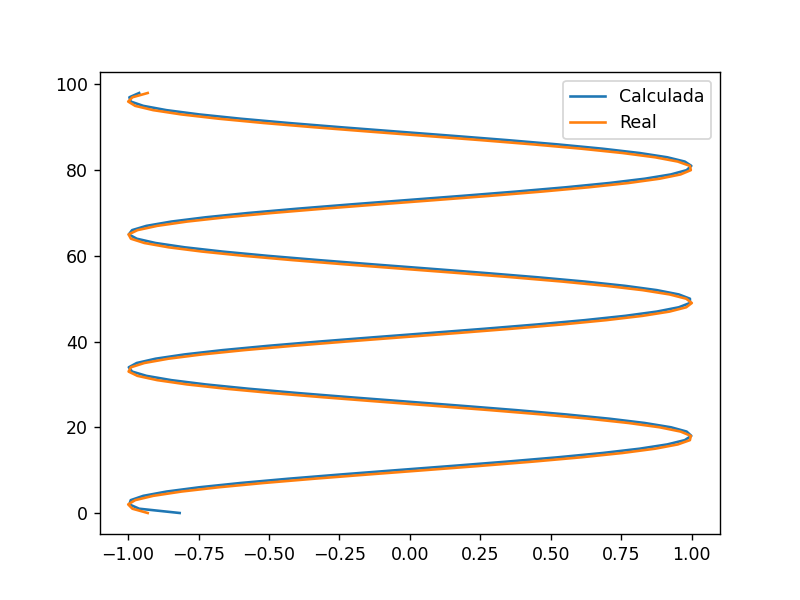

In [103]:
plt.close()
plt.plot(np.array(D).T[0], np.arange(len(D)), label = "Calculada")
plt.plot(np.array(D).T[1], np.arange(len(D)), label = "Real")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


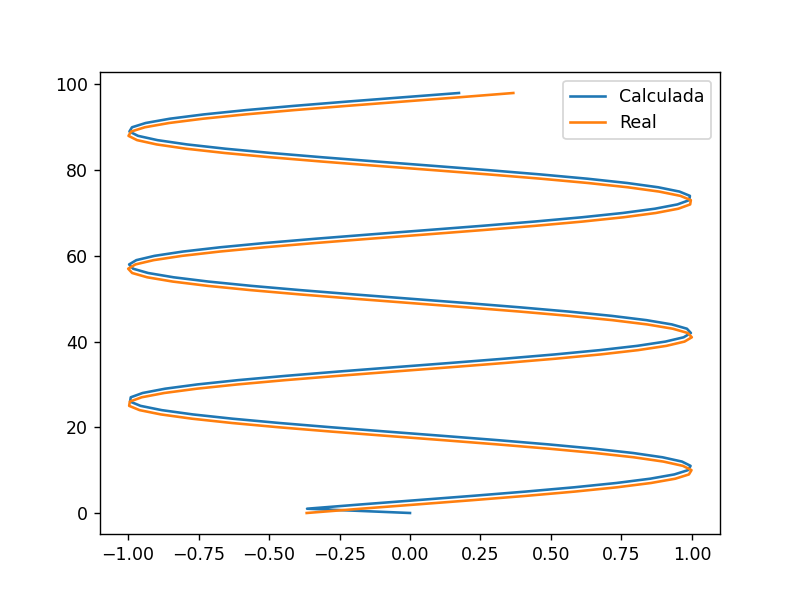

In [86]:
plt.close()
plt.plot(np.array(D_).T[0], np.arange(len(D_)), label = "Calculada")
plt.plot(np.array(D_).T[1], np.arange(len(D_)), label = "Real")
plt.legend()
plt.show()

## Modelo con la velocidad

In [5]:

nFrames = long.shape[0]

PastPos = (-10, np.sin(-10))
e = 0.00001
PastDer = None

NameError: name 'long' is not defined

In [20]:
class Physics:
    
    def __init__(self, PosInicial, dt = 0.1, k = 3, m = 800, miu = 2):
        self.Pos = PosInicial
        self.PastPos = None
        self.PastDer = None
        self.PastVel = [0, 0]
        
        self.TimeStep = 1
        self.long = np.arange(-10, 10, 0.2)
        
        self.dt = dt
        self.k = k

        self.miu = miu
        self.m = m
        self.N = m * 9.8
        self.Fr = self.N*miu
        self.aant = [0, 0]
        self.Fant = [0, 0]
        
    def getFirstDerivate(self, Pos):
        """
        y' = ( f(x) - f(x - h) ) / h
        
        In:
        Pos [tuple] - Posicion actual (x,y)
        
        Out:
        Derivada [float] - derivada en ese punto
        """
        
        h = (Pos[0] - self.PastPos[0])
        
        return (Pos[1] - self.PastPos[1]) / h
    
    def getSecondDerivate(self, Pos):
        """
        y' = ( f'(x) - f'(x - h) ) / h
        
        In:
        Pos [tuple] - Posicion actual (x,y)
        
        Out:
        Derivada [float] - segunda derivada en ese punto
        """
        h = (Pos[0] - self.PastPos[0])
        
        return (self.getFirstDerivate(Pos) - self.PastDer) / h
        
    
    def Update(self, Vel, Direccion, miu = None):
        
        """
        In:
        Direccion [tuple] - Posición actual [x,y]
        Vel [float] - Velocidad actual

        Out:
        NewPoss [tuple] - Posición actualizada [x,y]
        NewVel [float] - Velocidad actualizada
        """
        miu = miu if miu != None else self.miu
        
        x, y = self.Pos
        
        Dirx, Diry = Direccion
        # ======= Derivadas =========
        PrimDer = None
        if self.TimeStep > 1 :    
            PrimDer = self.getFirstDerivate((x,y))
            
        if self.TimeStep > 2:
            SegDer = self.getSecondDerivate((x,y))
        
        self.PastPos = [x, y]    
        # ======= Componentes de la posición =========
        alpha = np.arctan(Diry/Dirx)
        Vx = np.cos(alpha) * Vel
        Vy = np.sin(alpha) * Vel
        #print(f"Vx {Vx} y Vy {Vy} ")
        
        
        if self.TimeStep == 1 :
            self.Vel = [Vx, Vy]
            self.UpdateVelocityFirst(Vx, miu, ind = 0)
            self.UpdateVelocityFirst(Vy, miu, ind = 1)
        else:
            self.UpdateVelocity(Vx, miu, ind = 0)
            self.UpdateVelocity(Vy, miu, ind = 1)
        
        Vx = self.Vel[0]
        Vy = self.Vel[1]
        
        xa = self.PastPos[0]
        ya = self.PastPos[1]
        
        x = xa + Vx * self.dt + 0.5 * self.aant[0] * self.dt ** 2
        y = ya + Vy * self.dt + 0.5 * self.aant[1] * self.dt ** 2
        
        self.Pos = [x,y]
        
        # ====== Actualizando los parámetros =======
        self.PastDer = PrimDer
        self.TimeStep += 1
        
        
    def UpdateVelocity(self, v, miu = None, ind = 0):
        miu = miu if miu != None else self.miu
        #global aant, Fant, vi, vf
        Fr = self.m * 9.8 * miu
        Drag = self.k * ( ( ( self.Vel[ind] + self.PastVel[ind] )/2 )**2 )
        a = (self.Fant[ind] - Drag - Fr ) / self.m

        self.Vel[ind] = self.PastVel[ind] + self.dt*(a + self.aant[ind])/2

        self.Fant[ind] = self.m*self.aant[ind] + Fr + Drag
        self.PastVel[ind] = (v + self.Vel[ind])/2 #- miu
        
        self.PastVel[ind] = self.PastVel[ind] if self.PastVel[ind] > 0 else 0
        
        self.aant[ind] = a
        self.aant[ind] = self.aant[ind] if self.aant[ind] > 0 else 0
        
    def UpdateVelocityFirst(self,v, miu = None, ind = 0):
        miu = miu if miu != None else self.miu
        
        Fr = self.m * 9.8 * miu
        
        Drag = self.k * (self.PastVel[ind]**2)
        self.Vel[ind] = v
        
        a = (self.Vel[ind] - self.PastVel[ind])/self.dt
        F = self.m*(a) + Fr + Drag
        
        self.PastVel[ind] = self.Vel[ind] 
        self.aant[ind] = a
        self.Fant[ind] = F    

<IPython.core.display.Javascript object>


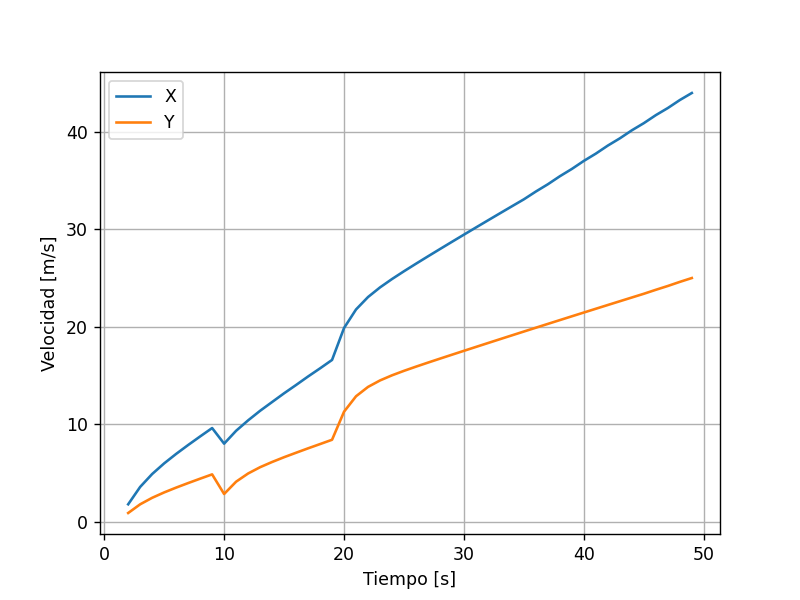

In [31]:
P = Physics((0,0), dt = 1)
Vels = []
fin = 50
miu = 0.5
for v in range(2, fin, 1):
    #if v > 35:
    #    v = 35
    #"""
    if v == 10:
        miu += 0.5
    if v == 20:
        miu -= 0.5
    #"""
    #Act(v, miu)
    #P.UpdateVelocity(v, miu, ind = 1)
    P.Update(v, [1,0.5], miu)
    Vels.append([P.Vel[0], P.Vel[1]])
    
Vels = np.array(Vels)
plt.plot(np.arange(2, fin, 1),Vels.T[0], label = "X")
plt.plot(np.arange(2, fin, 1),Vels.T[1], label = "Y")
#plt.plot(Vels.T[0], Vels.T[1])
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
plt.legend()
plt.grid()

## Funcionar - no tocar

In [798]:
def Act(v, miu):
    global aant, Fant, Drag, vi, vf
    Fr = N*miu
    Drag = k * (((vf+vi)/2)**2)
    a = (Fant - Drag - Fr ) / m
    
    vf = vi + dt*(a+aant)/2
    
    Fant = m*aant + Fr + Drag
    vi = (v + vf)/2 - miu
    aant = a

80 68.9676834668104


<IPython.core.display.Javascript object>


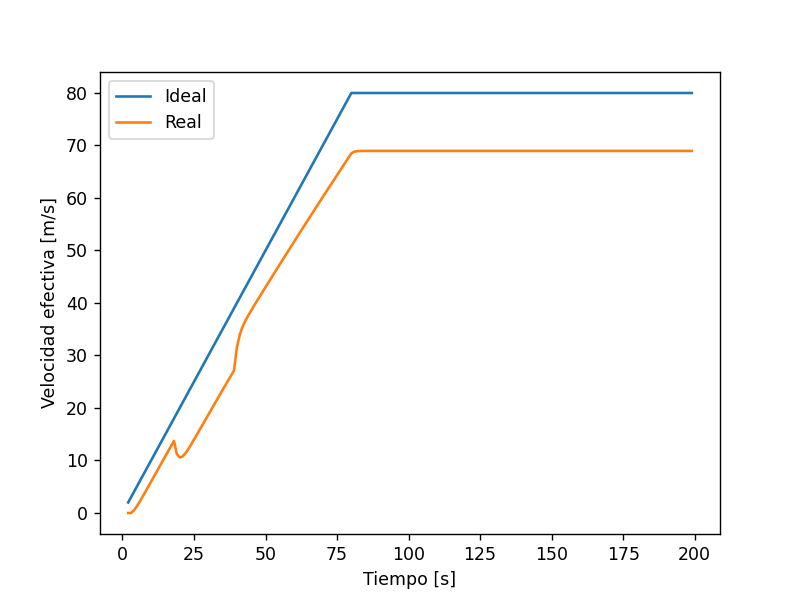

In [799]:
Vels = []
fin = 100

vi = 0
vf = 1
dt = 1
k = 3

miu = 2
m = 800


g = 9.8
N = m*g
Fr = N*miu

k = k

Drag = k * (vi**2)

a = (vf-vi)/dt
F = m*(a) + Fr + Drag

t = 1
"""
print(f"Vi: {vi:.2f} en t = {t}")
print(f"Vf: {vf:.2f} en t = {t}")
print(f"Aceleración: {a:.2f} en t = {t}")
print(f"Fuerza: {Fant:.2f} en t = {t}")
print(f"Drag: {k * vi**2}")
"""
vi = vf
aant = a
Fant = F

fin =200
for v in range(2, fin):
    if v > 80:
        v = 80
    if v == 19:
        miu += 1
    if v == 40:
        miu -= 1
    Act(v, miu)
    Vels.append([v, vi])
    
print(v, vi)
Vels = np.array(Vels)
plt.plot(np.arange(2, fin),Vels.T[0], label = "Ideal")
plt.plot(np.arange(2, fin),Vels.T[1], label = "Real")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad efectiva [m/s]")
plt.legend()

In [43]:
np.tan(np.deg2rad(26))

0.48773258856586144

In [45]:
np.rad2deg(np.arctan(3/4))

36.86989764584402